## Objetivo

Mostrar como se utiliza a ferramenta PySpark para montar querys simples para se trabalhar com os dados.

## Criação da Sessão e Carregamento dos Dados

Primeiramente, precisamos criar uma sessão e, só então, utilizar essa sessão para fazer a leitura dos dados. 

In [1]:
from pyspark.sql import SparkSession

# Inicializa a sessão do Spark
spark = SparkSession.builder \
    .appName("Query_Carros") \
    .config("spark.sql.execution.arrow.enabled", "true") \
    .getOrCreate()

In [2]:
# Leitura de dados de um arquivo CSV
df = spark.read.csv("../data/New_York_cars.csv", header=True, inferSchema=True)

## Schema e Criação de uma Tabela

In [3]:
df.printSchema()

root
 |-- newOrused: string (nullable = true)
 |-- name: string (nullable = true)
 |-- money: integer (nullable = true)
 |-- Exterior_color: string (nullable = true)
 |-- Interior_color: string (nullable = true)
 |-- Drivetrain: string (nullable = true)
 |-- MPG: string (nullable = true)
 |-- Fuel_type: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Engine: string (nullable = true)
 |-- Mileage: integer (nullable = true)
 |-- Convenience: string (nullable = true)
 |-- Entertainment: string (nullable = true)
 |-- Exterior: string (nullable = true)
 |-- Safety: string (nullable = true)
 |-- Seating: string (nullable = true)
 |-- Accidents_or_damage: string (nullable = true)
 |-- Clean_title: string (nullable = true)
 |-- 1-owner_vehicle: string (nullable = true)
 |-- Personal_use_only: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- currency: string (nullable = true)



Vemos que o PySpark consegue inferir o schema do .csv. Ele também pode carregar arquivos diretamente de bancos de dados via consultas, ou seja, ele seria capaz de inferir o schema do banco de dados ao se trabalhar com ele.

Vamos registrar o nosso dataframe como uma tabela. Apesar de podermos trabalhar com o dataframe da mesma maneira que trabalhamos com o Pandas, é interessante utilizarmos consultas SQL devido ao contexto em que estamos inserido (disciplina de Banco de Dados).

In [4]:
# Criação da tabela CARROS
df.createOrReplaceTempView("CARROS")

In [5]:
spark.sql("SELECT * FROM CARROS").show()

+---------+--------------------+-----+--------------------+--------------+----------+------+---------+------------------+--------------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-----------+---------------+-----------------+-----+----+--------------------+--------+
|newOrused|                name|money|      Exterior_color|Interior_color|Drivetrain|   MPG|Fuel_type|      Transmission|              Engine|Mileage|         Convenience|       Entertainment|            Exterior|              Safety|             Seating|Accidents_or_damage|Clean_title|1-owner_vehicle|Personal_use_only|brand|Year|               Model|currency|
+---------+--------------------+-----+--------------------+--------------+----------+------+---------+------------------+--------------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------

## Consultas SQL

Vamos tentar responder as seguintes perguntas utilizando de consultas SQL para trabalhar com os dados:

1. Quantos carros novos estão disponíveis?
2. Qual o carro usado mais caro e qual o carro novo mais barato?
3. Quais são os modelos de carros disponíveis para a marca 'Acura'?
4. Quantos carros possuem o recurso 'Backup Camera' em suas especificações de segurança?
5. Qual é a distribuição de anos dos carros listados?

#### Quantos carros novos estão disponíveis?

In [6]:
spark.sql("SELECT COUNT(name) FROM CARROS WHERE newOrused = 'New'").show()

+-----------+
|count(name)|
+-----------+
|      29280|
+-----------+



#### Qual o carro usado mais caro e qual o carro novo mais barato?

In [7]:
spark.sql("""
    SELECT name, money 
    FROM CARROS 
    WHERE newOrused = 'Used' 
    ORDER BY money DESC 
    LIMIT 1
""").show(truncate=False)

+----------------------------+-------+
|name                        |money  |
+----------------------------+-------+
|2015 Porsche 918 Spyder Base|2200000|
+----------------------------+-------+



In [8]:
spark.sql("""
    SELECT name, money 
    FROM CARROS 
    WHERE newOrused = 'New' 
    ORDER BY money ASC 
    LIMIT 1
""").show(truncate=False)

+---------------------+-----+
|name                 |money|
+---------------------+-----+
|2014 Bmw 535 I Xdrive|14634|
+---------------------+-----+



#### Quais são os modelos de carros disponíveis para a marca 'Acura'?

In [9]:
spark.sql("""
    SELECT DISTINCT model
    FROM CARROS 
    WHERE brand = 'Acura'
""").show(truncate=False)

+-------------------------------------+
|model                                |
+-------------------------------------+
|Rdx A-Spec Advance Package           |
|Rlx Base                             |
|Mdx 3.5L                             |
|Mdx Type S W/Advance                 |
|Tlx Type S W/Performance Tire        |
|Ilx W/Premium Pkg                    |
|Rdx With Navigation&Sunroof          |
|Rlx Navigation                       |
|Ilx Hybrid 1.5L                      |
|Tlx Technology & A-Spec              |
|Tl Base                              |
|Rdx Base (A6)                        |
|Zdx Base                             |
|Tlx                                  |
|Tl 3.5                               |
|Ilx Technology Plus & A-Spec Packages|
|Ilx Technology Package               |
|Tsx Technology                       |
|Mdx Advance                          |
|Tsx Special Edition                  |
+-------------------------------------+
only showing top 20 rows



In [10]:
spark.sql("""
    SELECT COUNT(DISTINCT model)
    FROM CARROS 
    WHERE brand = 'Acura'
""").show(truncate=False)

+---------------------+
|count(DISTINCT model)|
+---------------------+
|143                  |
+---------------------+



#### Quantos carros possuem o recurso 'Backup Camera' em suas especificações de segurança?

In [11]:
spark.sql("""
    SELECT COUNT(name)
    FROM CARROS 
    WHERE Safety LIKE '%Backup Camera%'
""").show(truncate=False)

+-----------+
|count(name)|
+-----------+
|122940     |
+-----------+



#### Qual é a distribuição de anos dos carros listados?

In [12]:
year_dist = spark.sql("""
    SELECT Year, COUNT(*) as count
    FROM CARROS 
    GROUP BY Year
    ORDER BY Year DESC
""")

year_dist.show(truncate=False)

+----+-----+
|Year|count|
+----+-----+
|2023|19822|
|2022|18147|
|2021|17599|
|2020|20874|
|2019|19733|
|2018|16325|
|2017|14781|
|2016|12965|
|2015|11960|
|2014|9629 |
|2013|7914 |
|2012|5741 |
+----+-----+



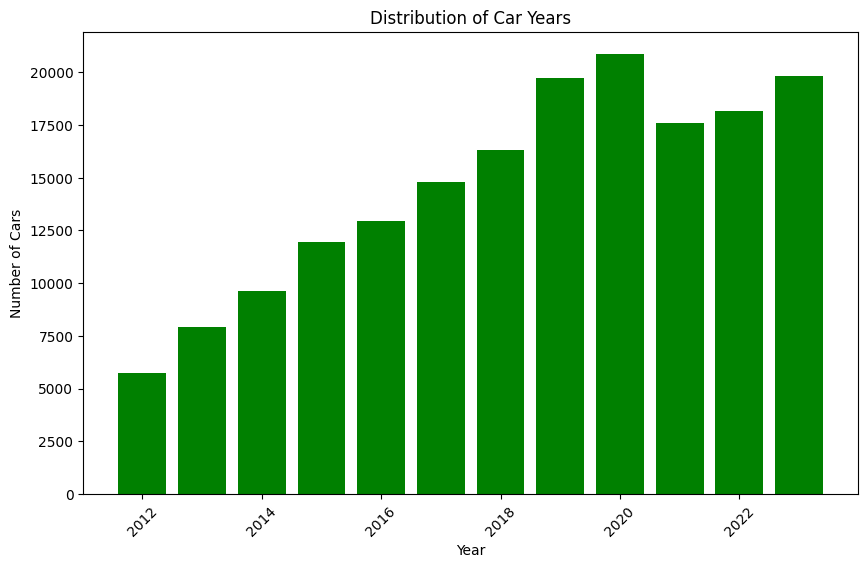

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter o resultado para um DataFrame Pandas
pd_year_dist = year_dist.toPandas()

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.bar(pd_year_dist['Year'], pd_year_dist['count'], color='green')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Distribution of Car Years')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Desativar a grade
plt.grid(False)

# Mostrar o histograma
plt.show()

## Desligamento da Sessão

É importante que, após términar de usar a aplicação, a sessão seja encerrada para evitar consumo de memória.

In [14]:
spark.stop()